# **PATTERNS**
### Project - Stroke Risk Factor
##### Team members - Bund Agarwal, Hritik Kumar, Atulya

Importing all the python library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

Storing dataset is "stroke" for easier access further on in the study

In [2]:
stroke1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke2 = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
stroke1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


***Observation***
Out of all the data values, only BMI values have some null values

#### **Dealing with missing data**
The unavailable BMI values are replaced with the mean BMI value

In [5]:
stroke1['bmi'].mean()
stroke1['bmi']=stroke1['bmi'].fillna(stroke1['bmi'].mean())

In [6]:
stroke2['bmi'].mean()
stroke2['bmi']=stroke2['bmi'].fillna(stroke2['bmi'].mean())

In [7]:
stroke1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


##### Using LabelEncoder to change string value to numerical values

In [8]:
le_gender=LabelEncoder()
stroke1['gender']=le_gender.fit_transform(stroke1['gender'])
le_Residence_type=LabelEncoder()
stroke1['Residence_type']=le_Residence_type.fit_transform(stroke1['Residence_type'])
le_smoking_status=LabelEncoder()
stroke1['smoking_status']=le_smoking_status.fit_transform(stroke1['smoking_status'])

le_ever_married=LabelEncoder()
stroke1['ever_married']=le_ever_married.fit_transform(stroke1['ever_married'])
le_work_type=LabelEncoder()
stroke1['work_type']=le_work_type.fit_transform(stroke1['work_type'])

In [9]:
stroke1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


***Conclusion***
All string values have been converted to numerical values. For example, Male in gender has been replaced with 1 and Female with 0.

## Feature Selection

In [10]:
X_train,X_test,y_train,y_test=train_test_split(stroke1.drop('stroke',axis=1),stroke1['stroke'],test_size=0.3)

<AxesSubplot:>

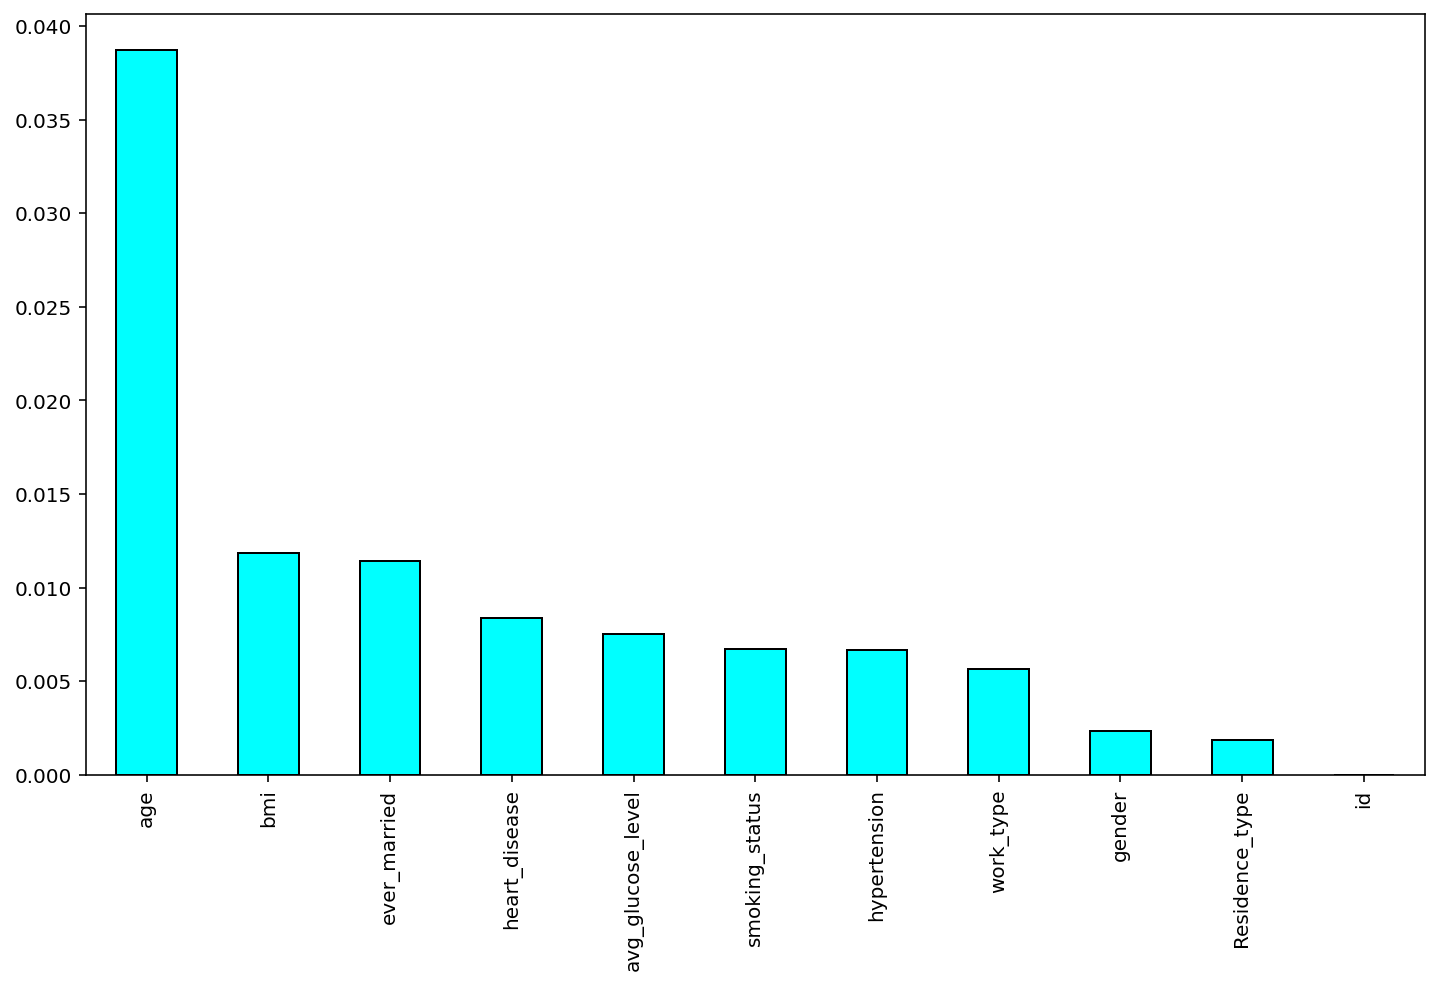

In [11]:
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info_sort=mutual_info.sort_values(ascending=False)
mutual_info_sort.plot.bar(color='cyan', edgecolor='black')

***Conclusion***
(Based on Mutual Information Classifier)
The features- smoking_status and gender have 0 dependency on stroke, i.e. the variables are independent of each other. 

##### Gender wise ditribution

Text(0, 0.5, 'Proportion of Stroke')

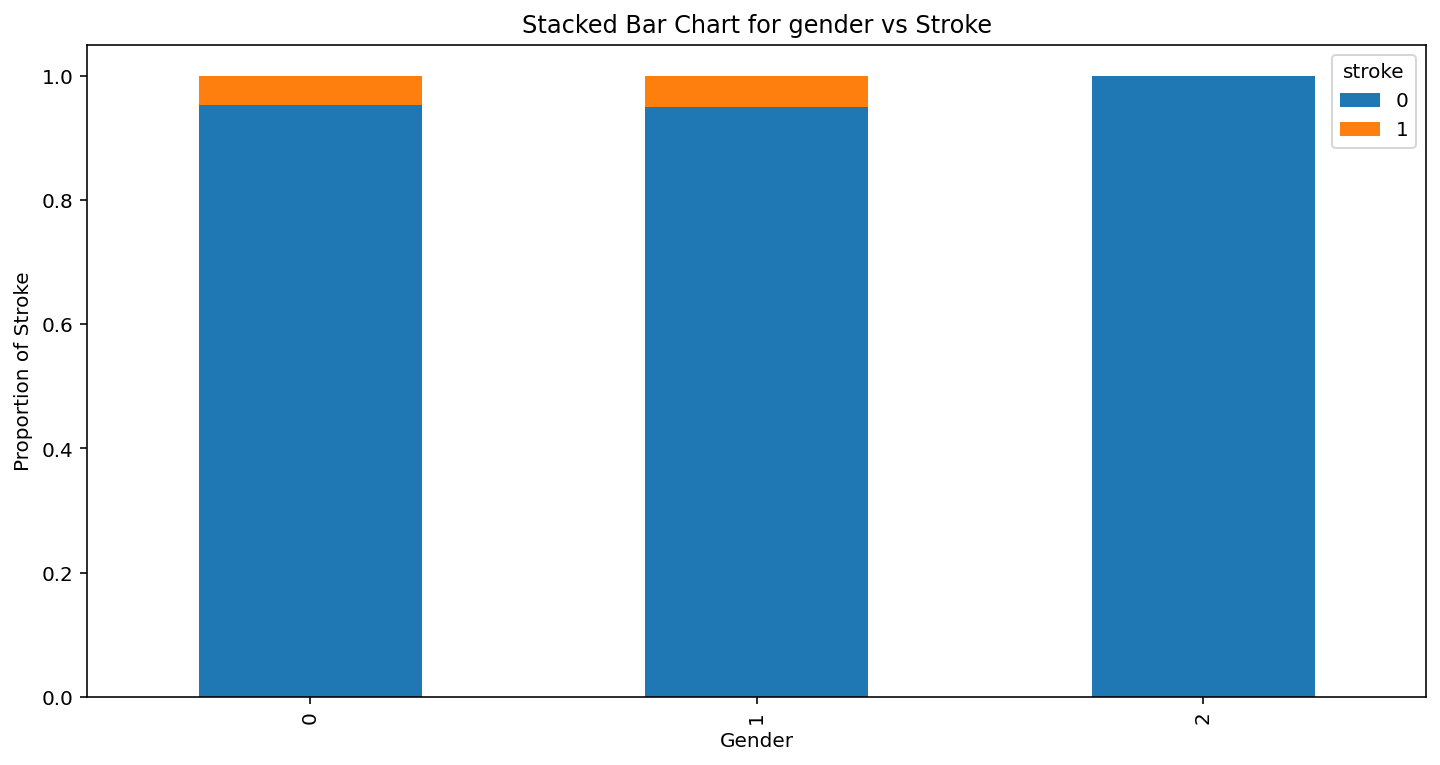

In [12]:
plt.rcParams["figure.figsize"] = (12, 6)
table = pd.crosstab(stroke1.gender,stroke1.stroke)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar' , stacked = True)
plt.title('Stacked Bar Chart for gender vs Stroke')
plt.xlabel('Gender')
plt.ylabel('Proportion of Stroke')

***Conclusion***
Strokes occur in the same ratio for men and women. So we arrive at the conclusion that gender has no role in deciding stroke probability.

##### Age wise stroke frequency

Text(0, 0.5, 'Proportion of Stroke')

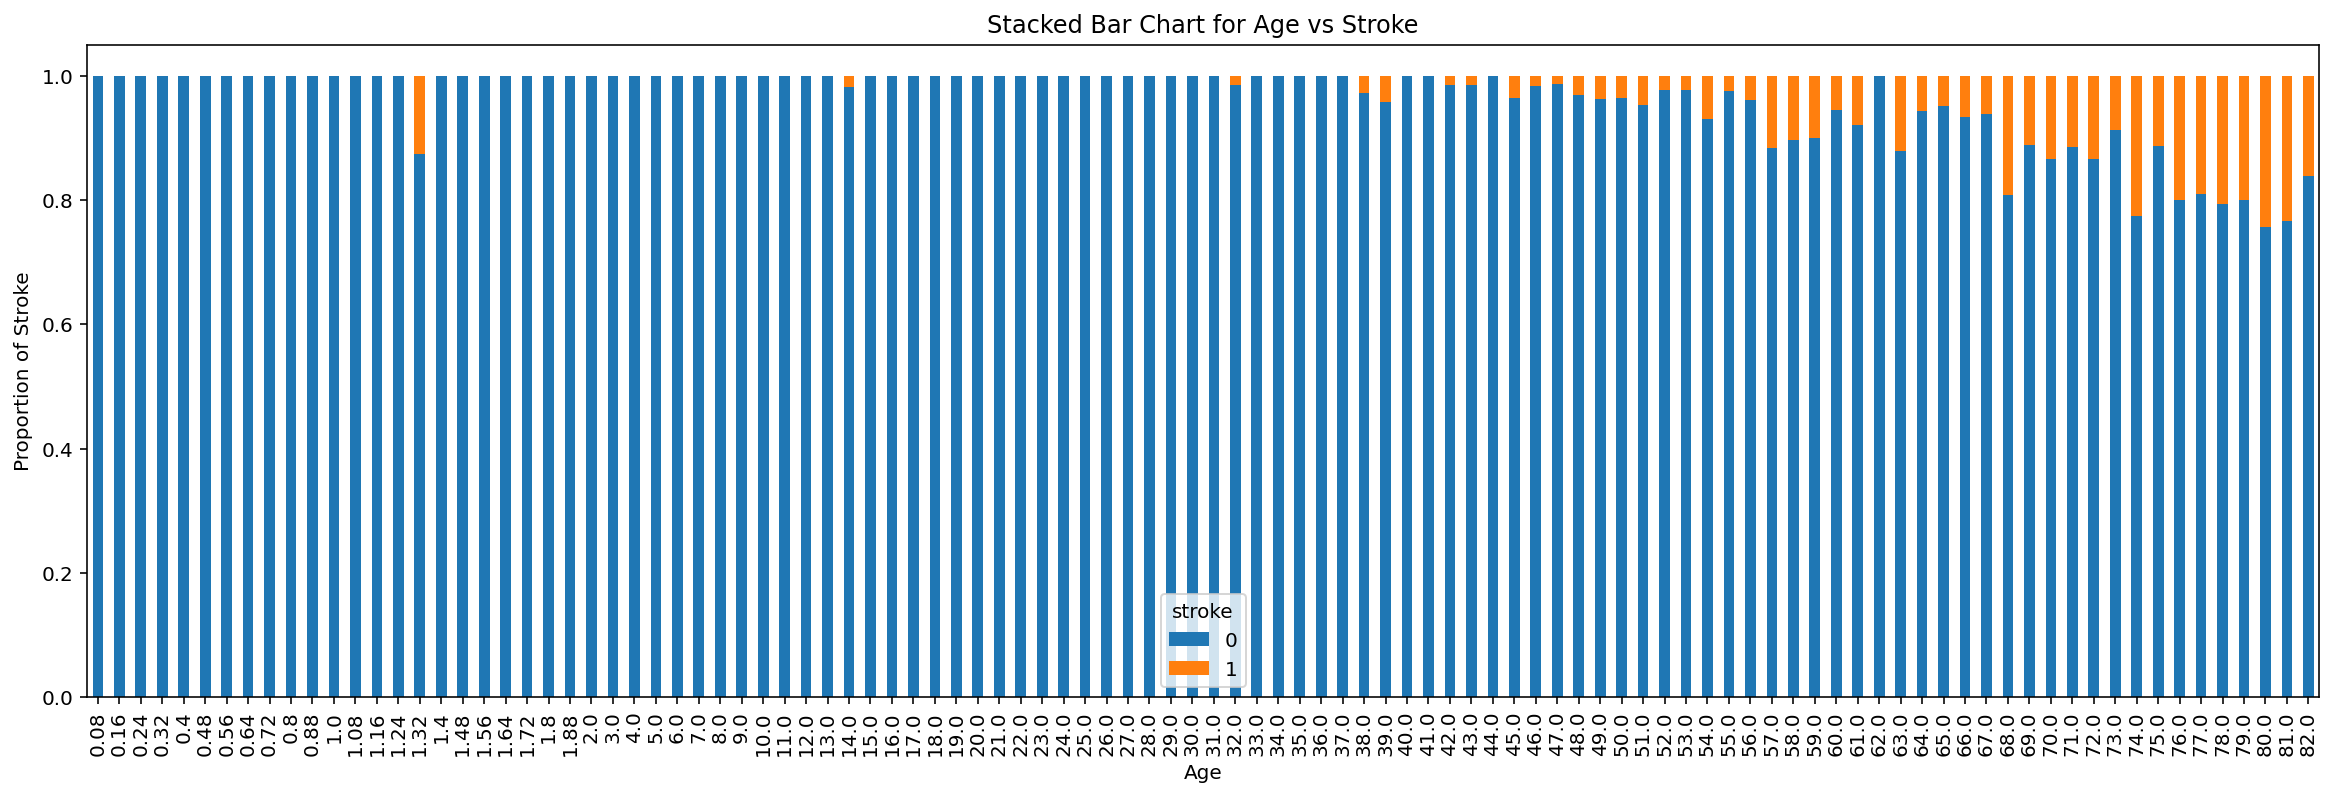

In [14]:
plt.rcParams["figure.figsize"] = (20, 6)
table = pd.crosstab(stroke1.age,stroke1.stroke)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar' , stacked = True)
plt.title('Stacked Bar Chart for Age vs Stroke')
plt.xlabel('Age')
plt.ylabel('Proportion of Stroke')

***Conclusion***
The chances of getting a stroke increases with age.

##### Stroke distribution for hypertension

Text(0, 0.5, 'Proportion of Stroke')

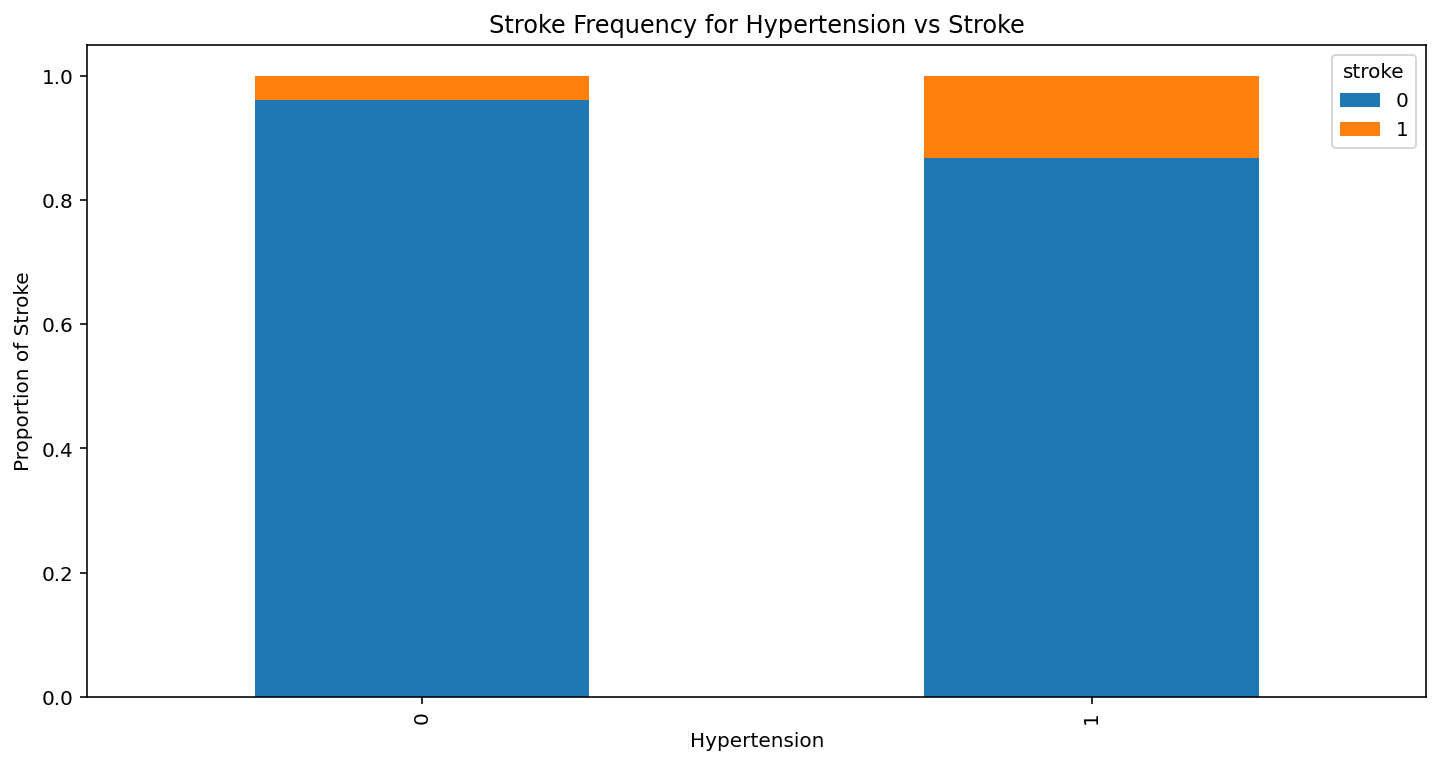

In [15]:
plt.rcParams["figure.figsize"] = (12, 6)
table = pd.crosstab(stroke1.hypertension,stroke1.stroke)
table.div(table.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title('Stroke Frequency for Hypertension vs Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Proportion of Stroke')

***Conclusion***
People with hypertension are more prone to strokes than those without hypertension.

##### Stroke distribution for heart disease

Text(0, 0.5, 'Proportion of Stroke')

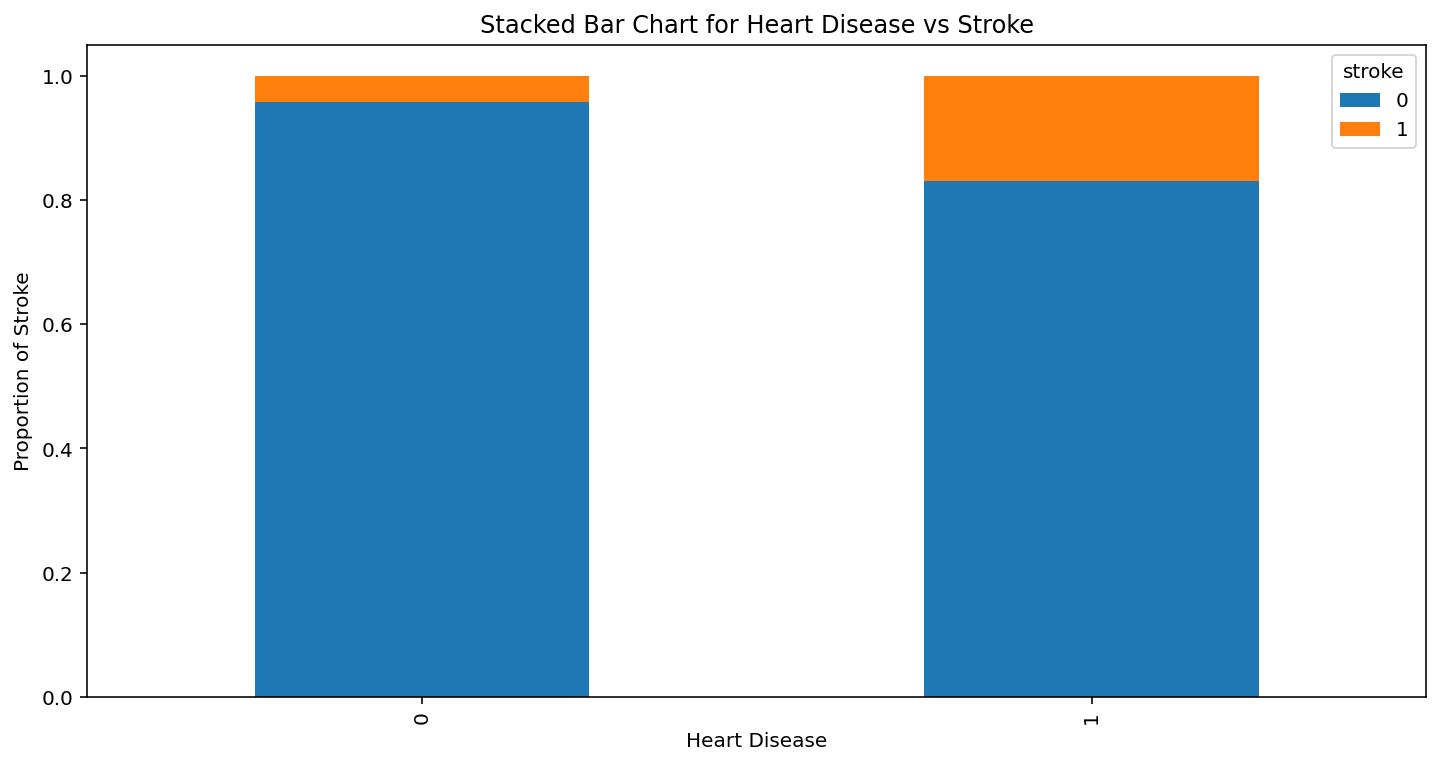

In [16]:
plt.rcParams["figure.figsize"] = (12, 6)
table = pd.crosstab(stroke1.heart_disease,stroke1.stroke)
table.div(table.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title('Stacked Bar Chart for Heart Disease vs Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Proportion of Stroke')

***Conclusion***
Heart diseases increase the risk factor of getting a stroke.

##### Stacked Bar Chart distribution for Marital Status and Stroke

Text(0, 0.5, 'Proportion of Stroke')

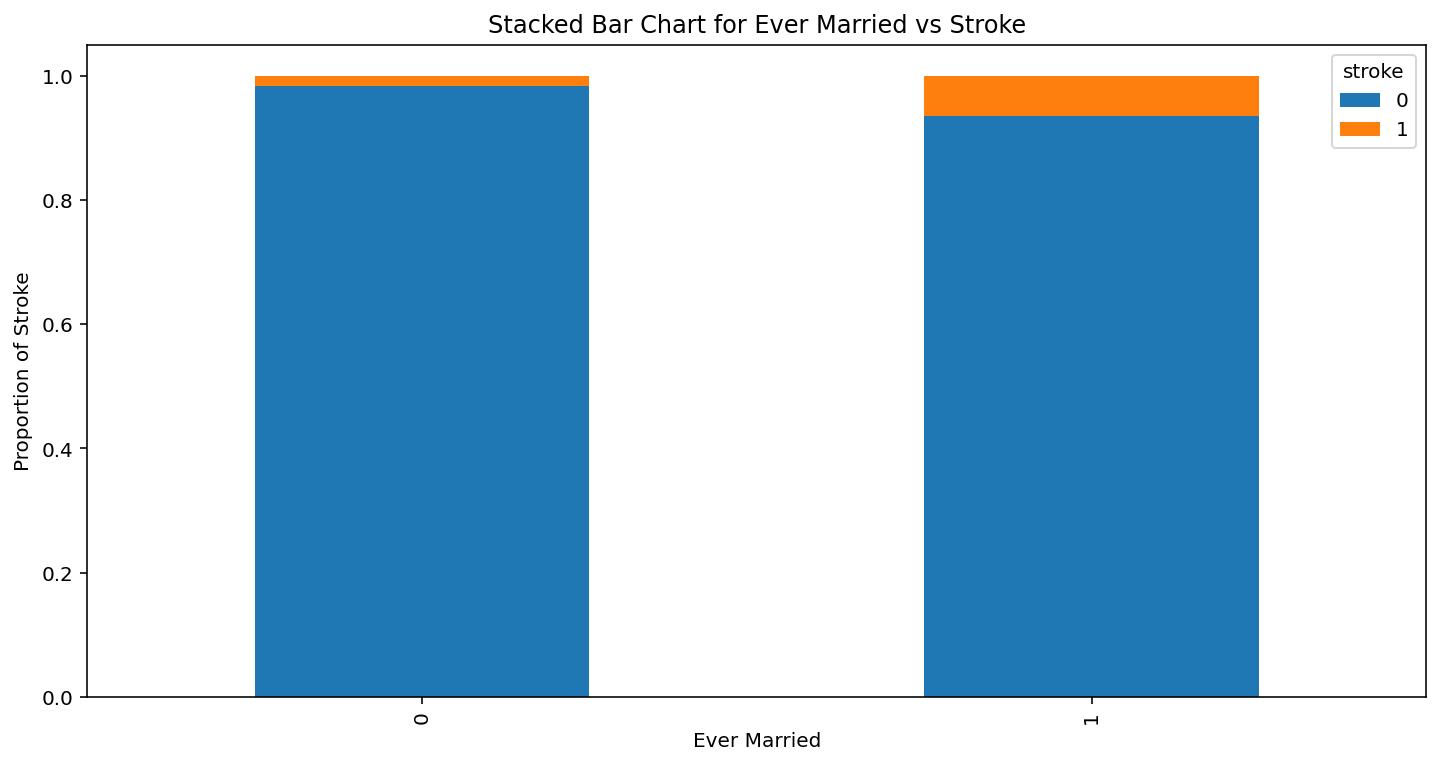

In [17]:
plt.rcParams["figure.figsize"] = (12, 6)
table = pd.crosstab(stroke1.ever_married,stroke1.stroke)
table.div(table.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title('Stacked Bar Chart for Ever Married vs Stroke')
plt.xlabel('Ever Married')
plt.ylabel('Proportion of Stroke')

***Conclusion***
Marital status plays a significant role in stroke risk factor as married people get strokes more often as compared to unmarried people.

##### Stacked bar chart for work type vs stroke

Text(0, 0.5, 'Proportion of Stroke')

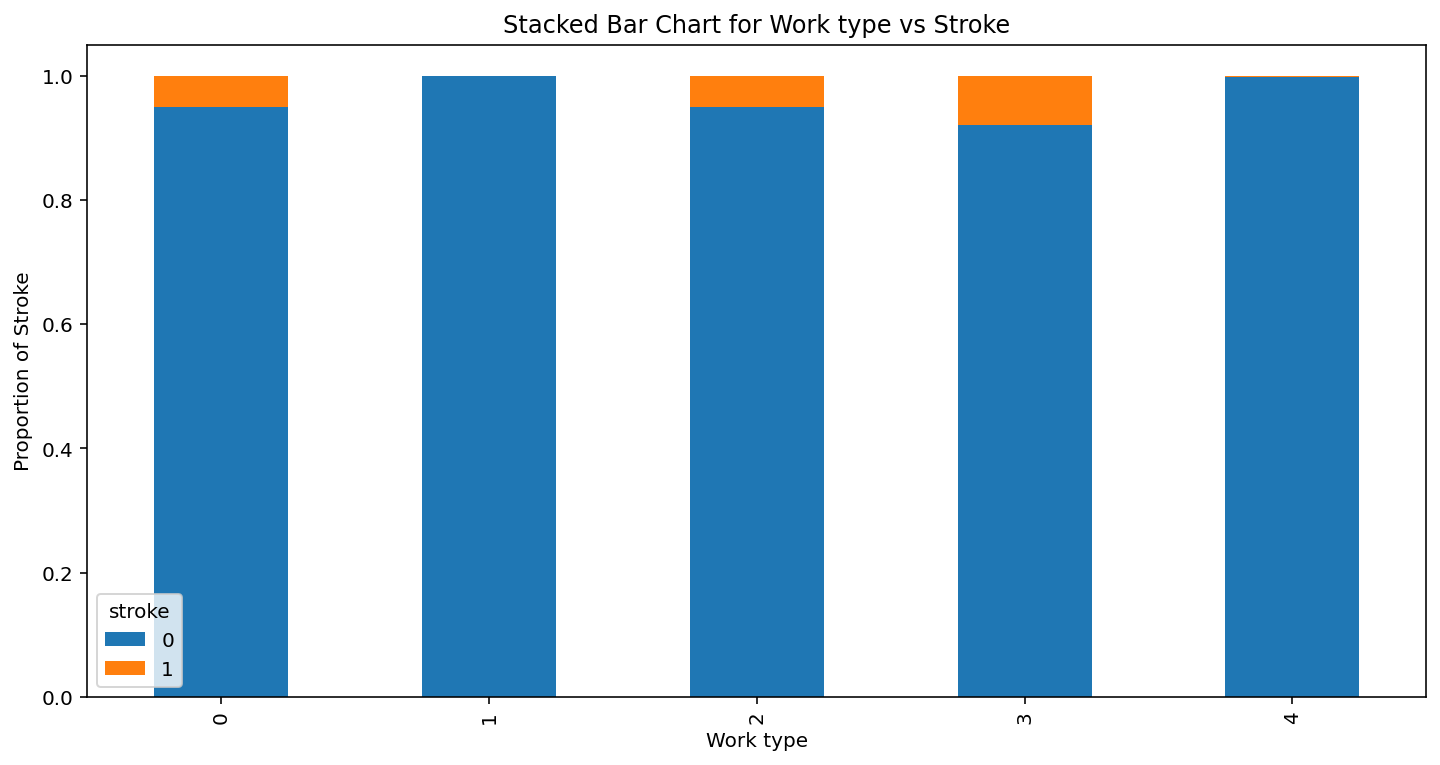

In [18]:
plt.rcParams["figure.figsize"] = (12, 6)
table = pd.crosstab(stroke1.work_type,stroke1.stroke)
table.div(table.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title('Stacked Bar Chart for Work type vs Stroke')
plt.xlabel('Work type')
plt.ylabel('Proportion of Stroke')

##### Stroke frequency for residence type

Text(0, 0.5, 'Frequency of Stroke')

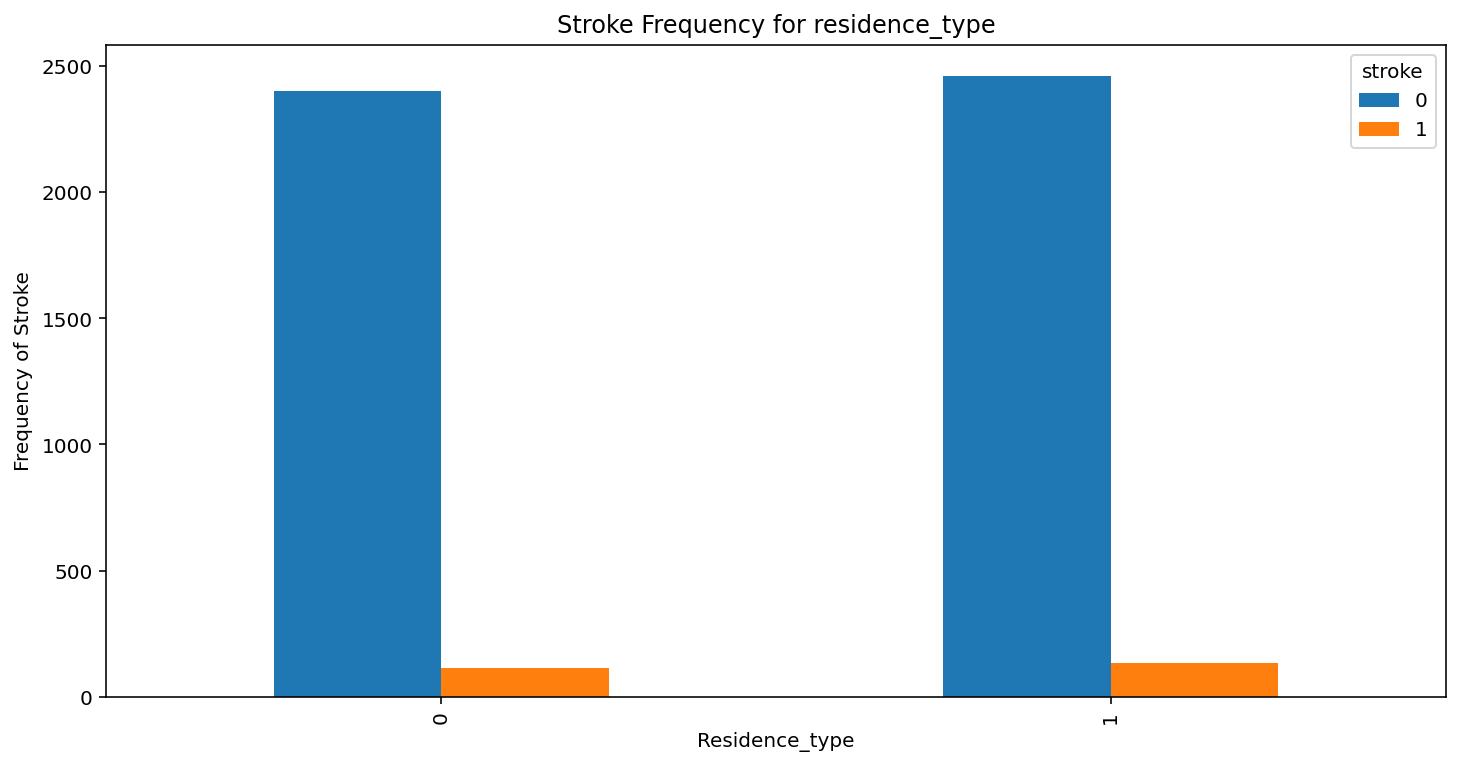

In [19]:
plt.rcParams["figure.figsize"] = (12, 6)
pd.crosstab(stroke1.Residence_type,stroke1.stroke).plot(kind = 'bar')
plt.title('Stroke Frequency for residence_type')
plt.xlabel('Residence_type')
plt.ylabel('Frequency of Stroke')

##### Stacked bar chart for smoking status vs stroke

Text(0, 0.5, 'Proportion of Stroke')

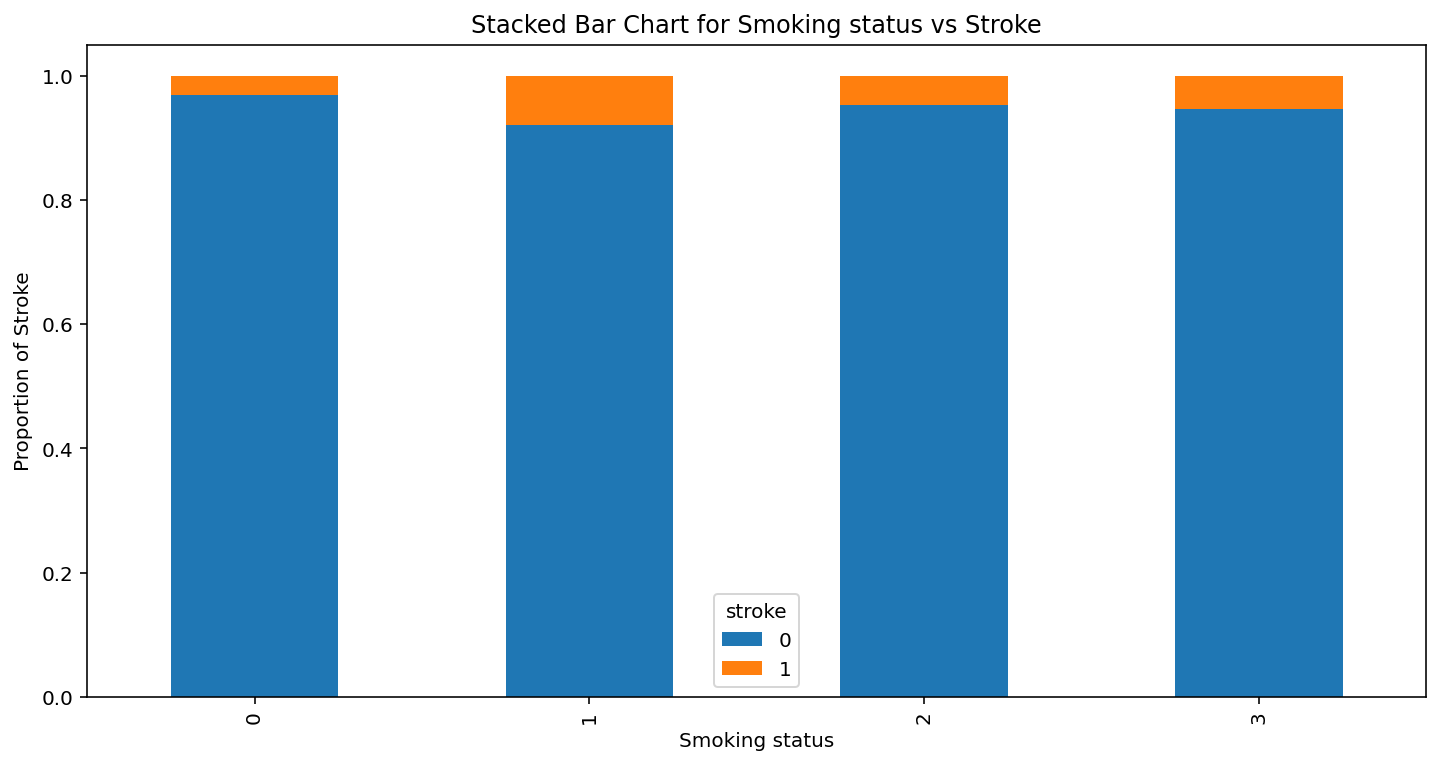

In [20]:
plt.rcParams["figure.figsize"] = (12, 6)
table = pd.crosstab(stroke1.smoking_status,stroke1.stroke)
table.div(table.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title('Stacked Bar Chart for Smoking status vs Stroke')
plt.xlabel('Smoking status')
plt.ylabel('Proportion of Stroke')

#### Number of stroke cases

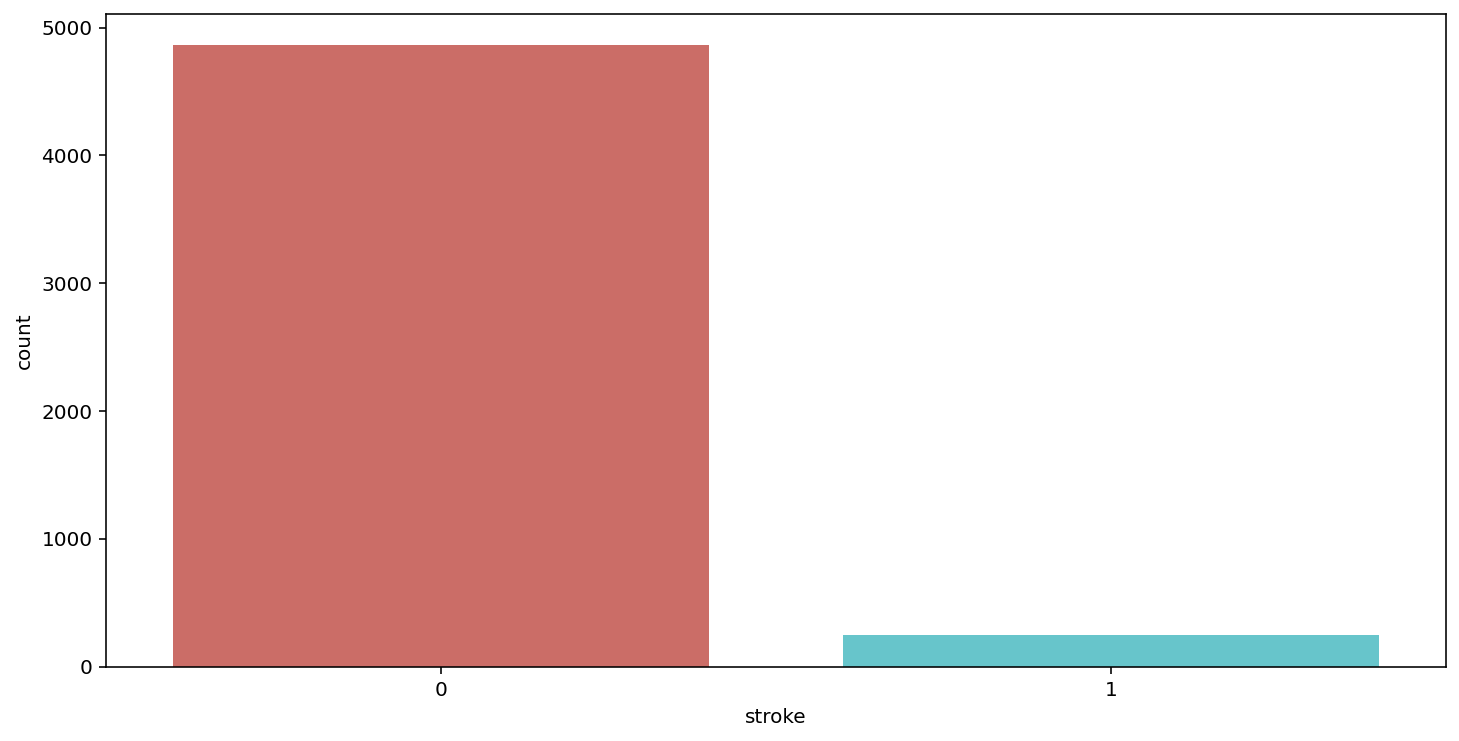

In [21]:
sns.countplot(x= 'stroke',data = stroke1,palette="hls")
plt.show()

## Logistic regression after feature selection

After data analysis and studying features that affect the stroke risk factor, we proceed to applying logistic regression on the dataset.

In [22]:
#Encoding_categorial_feature_to dummy_variables

gender = pd.get_dummies(stroke2['gender'])
ever_married = pd.get_dummies(stroke2['ever_married'])
work_type = pd.get_dummies(stroke2['work_type'])
smoking_status = pd.get_dummies(stroke2['smoking_status'])

stroke2.drop(['id','gender','ever_married','work_type','Residence_type','smoking_status','stroke'],axis=1,inplace=True)
stroke2 = pd.concat([stroke2,gender,ever_married,work_type,smoking_status,stroke1.stroke],axis=1)

In [23]:
x = stroke2.iloc[:,:-1].values  #Independent Variable
y = stroke2.iloc[:,-1].values   #Dependent Variable

In [24]:
#Counting Result

stroke2['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [25]:
#Spliting the Data set

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)  # 75% of data used for training and 25% of data is used for testing

In [26]:
#Applying the logistic regression

log_reg = LogisticRegression(max_iter = 100000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [27]:
#Predicting testset result

y_pred = log_reg.predict(x_test)

##### Accuracy check

In [28]:
#Printing Accuracy of prediction

print("Accuracy",(log_reg.score(x_test,y_test)))

Accuracy 0.9405320813771518


In [29]:
#Evaluating the result

confusion_matrix(y_test,y_pred)

array([[1202,    1],
       [  75,    0]])

#### Matrix Description
COLUMN 1       |     COLUMN 2
---------------|-------------
True positive  |      1202
False positive |        1
False negative |       75
True negative  |        0
